In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('data.csv')

In [23]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Menampilkan Total Data Kosong

In [24]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


# Menampilkan Total Data Duplikat

In [25]:
df.duplicated().sum()

np.int64(0)

# Menampilkan Outliers

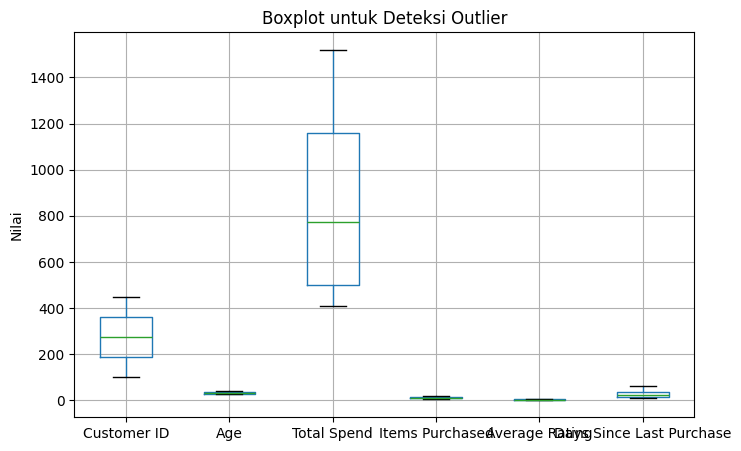

In [26]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(8,5))
df.loc[:, numeric_cols].boxplot()
plt.title("Boxplot untuk Deteksi Outlier")
plt.ylabel("Nilai")
plt.show()

# Mengatasi Missing Value Pada Satisfaction Level

In [27]:
df.dropna(subset=['Satisfaction Level'], inplace=True)

# Normalisasi/Standarisasi Kolom Numerik

In [28]:
scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [29]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,-1.728843,Female,-0.939761,New York,Gold,0.754230,0.330381,0.996757,True,-0.120022,Satisfied
1,-1.718957,Male,0.086720,Los Angeles,Silver,-0.186319,-0.394236,0.132172,False,-0.640260,Neutral
2,-1.709072,Female,1.934386,Chicago,Bronze,-0.933192,-0.877314,-1.078247,True,1.143413,Unsatisfied
3,-1.699187,Male,-0.734465,San Francisco,Gold,1.751261,1.538076,1.169674,False,-1.086179,Satisfied
4,-1.689301,Male,-1.350354,Miami,Silver,-0.352721,0.088842,-0.040745,True,2.109570,Unsatisfied


# Encoding data Kategorikal

In [30]:
encoder = LabelEncoder()

kategorical_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in kategorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [31]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,-1.728843,0,-0.939761,4,1,0.754230,0.330381,0.996757,1,-0.120022,1
1,-1.718957,1,0.086720,2,2,-0.186319,-0.394236,0.132172,0,-0.640260,0
2,-1.709072,0,1.934386,0,0,-0.933192,-0.877314,-1.078247,1,1.143413,2
3,-1.699187,1,-0.734465,5,1,1.751261,1.538076,1.169674,0,-1.086179,1
4,-1.689301,1,-1.350354,3,2,-0.352721,0.088842,-0.040745,1,2.109570,2


# Feature Enginering

In [32]:
df["Spend per Item"] = df["Total Spend"] / df["Items Purchased"]

In [33]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Spend per Item
0,-1.728843,0,-0.939761,4,1,0.754230,0.330381,0.996757,1,-0.120022,1,2.282909
1,-1.718957,1,0.086720,2,2,-0.186319,-0.394236,0.132172,0,-0.640260,0,0.472606
2,-1.709072,0,1.934386,0,0,-0.933192,-0.877314,-1.078247,1,1.143413,2,1.063692
3,-1.699187,1,-0.734465,5,1,1.751261,1.538076,1.169674,0,-1.086179,1,1.138605
4,-1.689301,1,-1.350354,3,2,-0.352721,0.088842,-0.040745,1,2.109570,2,-3.970209


# Splitting Data

In [34]:
X = df.drop(columns=["Satisfaction Level"])
y = df["Satisfaction Level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\nUkuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


Ukuran data training: (243, 11)
Ukuran data testing: (105, 11)
